<a href="https://colab.research.google.com/github/ElenJ/NLP_demo/blob/main/finBert_textbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets transformers venny4py yfinance

# Import necessary components from the transformers library
from transformers import pipeline, AutoTokenizer, set_seed

# Import dataset handling tools
from datasets import load_dataset

# Import data manipulation and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
from venny4py.venny4py import venny4py

# Import date manipulation classes
from datetime import datetime, timedelta

# Import regular expression module for parsing dates
import re

# Import yfinance module for accessing stock price data
import yfinance as yf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is i

In [ ]:
dataset = load_dataset('ccdv/cnn_dailymail', '3.0.0')
tesla_articles = dataset['train'].filter(lambda example: 'Tesla' in example['article'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

cnn_dailymail.py:   0%|          | 0.00/9.27k [00:00<?, ?B/s]

The repository for ccdv/cnn_dailymail contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/cnn_dailymail.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


cnn_stories.tgz:   0%|          | 0.00/159M [00:00<?, ?B/s]

dailymail_stories.tgz:   0%|          | 0.00/376M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/287113 [00:00<?, ? examples/s]

In [ ]:
# Define a function to perform sentiment analysis using a specified model
def text_classification(model_name, texts):
    set_seed(42)  # Ensure reproducibility
    pipe = pipeline("text-classification", model=model_name)  # Initialize the sentiment analysis pipeline
    result = pipe(texts['article'], truncation=True, max_length=512)  # Analyze texts
    del pipe  # Clean up resources
    return pd.DataFrame(result)  # Return results in a DataFrame


In [ ]:
# Load from file # RESTART FROM HERE
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving model_results.pkl to model_results.pkl
User uploaded file "model_results.pkl" with length 8358 bytes


In [ ]:
import pickle
# Load from file
with open('model_results.pkl', 'rb') as f:
  model_results = pickle.load(f)

finbert_result = model_results["finbert"]
distilbert_result = model_results["distilbert"]
bert_base_result = model_results["bert_base"]
deepseek_result = model_results["deepseek"]

In [ ]:
bert_base_result['label'].replace(['1 star', '2 stars'], 'negative', inplace=True)
bert_base_result['label'].replace(['4 stars', '5 stars'], 'positive', inplace=True)
bert_base_result['label'].replace(['3 stars'], 'neutral', inplace=True)

distilbert_result['label'].replace(['LABEL_0'], 'negative', inplace=True)
distilbert_result['label'].replace(['LABEL_1'], 'positive', inplace=True)

deepseek_result['label'].replace(['LABEL_0'], 'negative', inplace=True)
deepseek_result['label'].replace(['LABEL_1'], 'positive', inplace=True)


<ipython-input-6-6a7a4458a1fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bert_base_result['label'].replace(['1 star', '2 stars'], 'negative', inplace=True)
<ipython-input-6-6a7a4458a1fd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

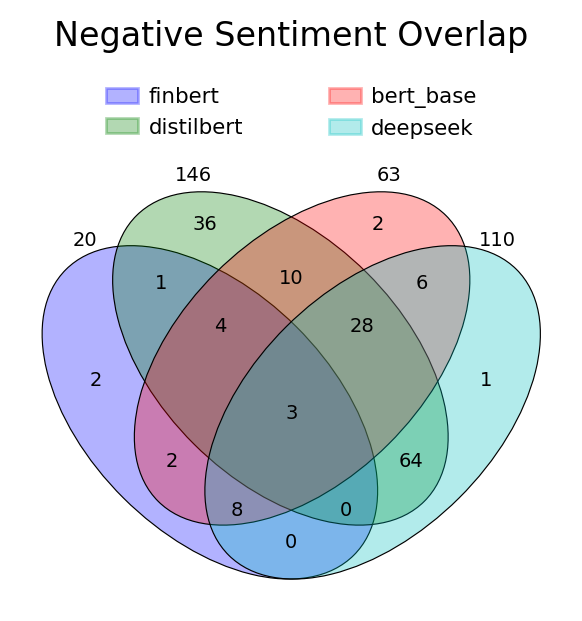

In [ ]:
# Define sets for Venn diagram visualization
finbert_negative = finbert_result[finbert_result["label"] == "negative"].index.tolist()
sets_negative = {
    'finbert': set(finbert_negative),
    'distilbert': set(distilbert_result[distilbert_result["label"] == "negative"].index.tolist()),
    'bert_base': set(bert_base_result[bert_base_result["label"] == "negative"].index.tolist()),
    'deepseek': set(deepseek_result[deepseek_result["label"] == "negative"].index.tolist())
}

# Plot Venn diagram for negative sentiment overlap
venny4py(sets=sets_negative)
plt.title("Negative Sentiment Overlap")
plt.show()


In [ ]:
# Find articles uniquely identified as positive by FinBERT
finbert_positive_indices = model_results["finbert"][model_results["finbert"]["label"] == "positive"].index.tolist()
other_models_positive_indices = []
for model_name in ["distilbert", "bert_base", "deepseek"]:
  other_models_positive_indices.extend(model_results[model_name][model_results[model_name]["label"] == "positive"].index.tolist())

uniquely_finbert_positive_indices = list(set(finbert_positive_indices) - set(other_models_positive_indices))

# Print or process the articles uniquely identified as positive by FinBERT
for index in uniquely_finbert_positive_indices:
  print(f"Article {index}: {tesla_articles[index]['article']}...")  # Print a snippet of the article


Article 135: By . Victoria Woollaston . PUBLISHED: . 08:52 EST, 27 February 2014 . | . UPDATED: . 12:32 EST, 27 February 2014 . Tesla Motors has unveiled plans for a $5billion Gigafactory to ramp up production of batteries for its electric cars. The Californian firm is still deciding where the factory will be based, but the project is set provide more than 6,500 jobs. Tesla claims the factory will cut current battery production costs by up to 30 per cent, and it will be powered predominantly by renewable energy sources, such as wind and solar. Scroll Down for Video . Tesla Motors has unveiled plans for a $5billion Gigafactory, illustration pictured, to ramp up production of batteries for its electric cars. The Californian firm is still deciding where the factory will be based, but it is expected to be powered predominantly by renewable energy sources, such as wind and solar . A staggering 96,000 plug-in electric cars were bought in the U.S. in 2013 . alone and while these eco-conscious

In [ ]:
# Iterate through the indices of articles uniquely identified as positive by FinBERT
for index in uniquely_finbert_positive_indices:
    print(f"\nArticle {index} predictions:")

    print(f"  finbert: {finbert_result['label'][index]}, {round(finbert_result['score'][index], 2)}")
    print(f"  distilbert: {distilbert_result['label'][index]}, {round(distilbert_result['score'][index], 2)}")
    print(f"  bert_base: {bert_base_result['label'][index]}, {round(bert_base_result['score'][index], 2)}")
    print(f"  deepseek: {deepseek_result['label'][index]}, {round(deepseek_result['score'][index], 2)}")



Article 135 predictions:
  finbert: positive, 0.56
  distilbert: negative, 0.51
  bert_base: negative, 0.28
  deepseek: negative, 1.0


In [ ]:
# Find out the first and last avaialble dates on tesla articles to plot the tesla stock chart between these dates
published_dates = []

for index in range(len(tesla_articles)):
    article_text = tesla_articles[index]['article']

    # Regex to capture the date pattern in the articles
    date_match = re.search(r"\.\s+(\d{2}:\d{2}\s+EST,\s+\d{1,2}\s+\w+\s+\d{4})\s+\.", article_text)

    if date_match:
        published_date_str = date_match.group(1)  # Get the extracted date string
        try:
            # Attempt to parse the date string into a datetime object
            published_date = datetime.strptime(published_date_str, "%H:%M EST, %d %B %Y")
            published_dates.append(published_date)
        except ValueError:
            print(f"Article {index}: Could not parse date '{published_date_str}'")


# Find the first and last dates using min and max on datetime objects
if published_dates:  # Check if published_dates is not empty
    first_date = min(published_dates)
    last_date = max(published_dates)

    print(f"First date: {first_date.strftime('%d %B %Y')}")
    print(f"Last date: {last_date.strftime('%d %B %Y')}")
else:
    print("No dates found in the articles.")


First date: 17 January 2012
Last date: 03 March 2014


In [ ]:
# Fetch Tesla stock data for the corresponding dates
tesla_data = yf.download("TSLA", start=first_date, end=last_date + timedelta(days=1))


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
published_dates_positives = []

for index in finbert_positive_indices:  # Iterate through positive indices
    article_text = tesla_articles[index]['article']

    # Modified regex to capture the date pattern in the articles
    date_match = re.search(r"\.\s+(\d{2}:\d{2}\s+EST,\s+\d{1,2}\s+\w+\s+\d{4})\s+\.", article_text)

    if date_match:
        published_date_str = date_match.group(1)  # Get the extracted date string
        try:
            # Attempt to parse the date string into a datetime object
            published_date = datetime.strptime(published_date_str, "%H:%M EST, %d %B %Y")
            published_dates_positives.append(published_date)
            print(published_date)
        except ValueError:
            print(f"Article {index}: Could not parse date '{published_date_str}'")

# Find the first and last dates using min and max on datetime objects
if published_dates_positives:  # Check if published_dates is not empty
    first_date_positive = min(published_dates_positives)
    last_date_positive = max(published_dates_positives)


2014-02-27 08:52:00


/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))


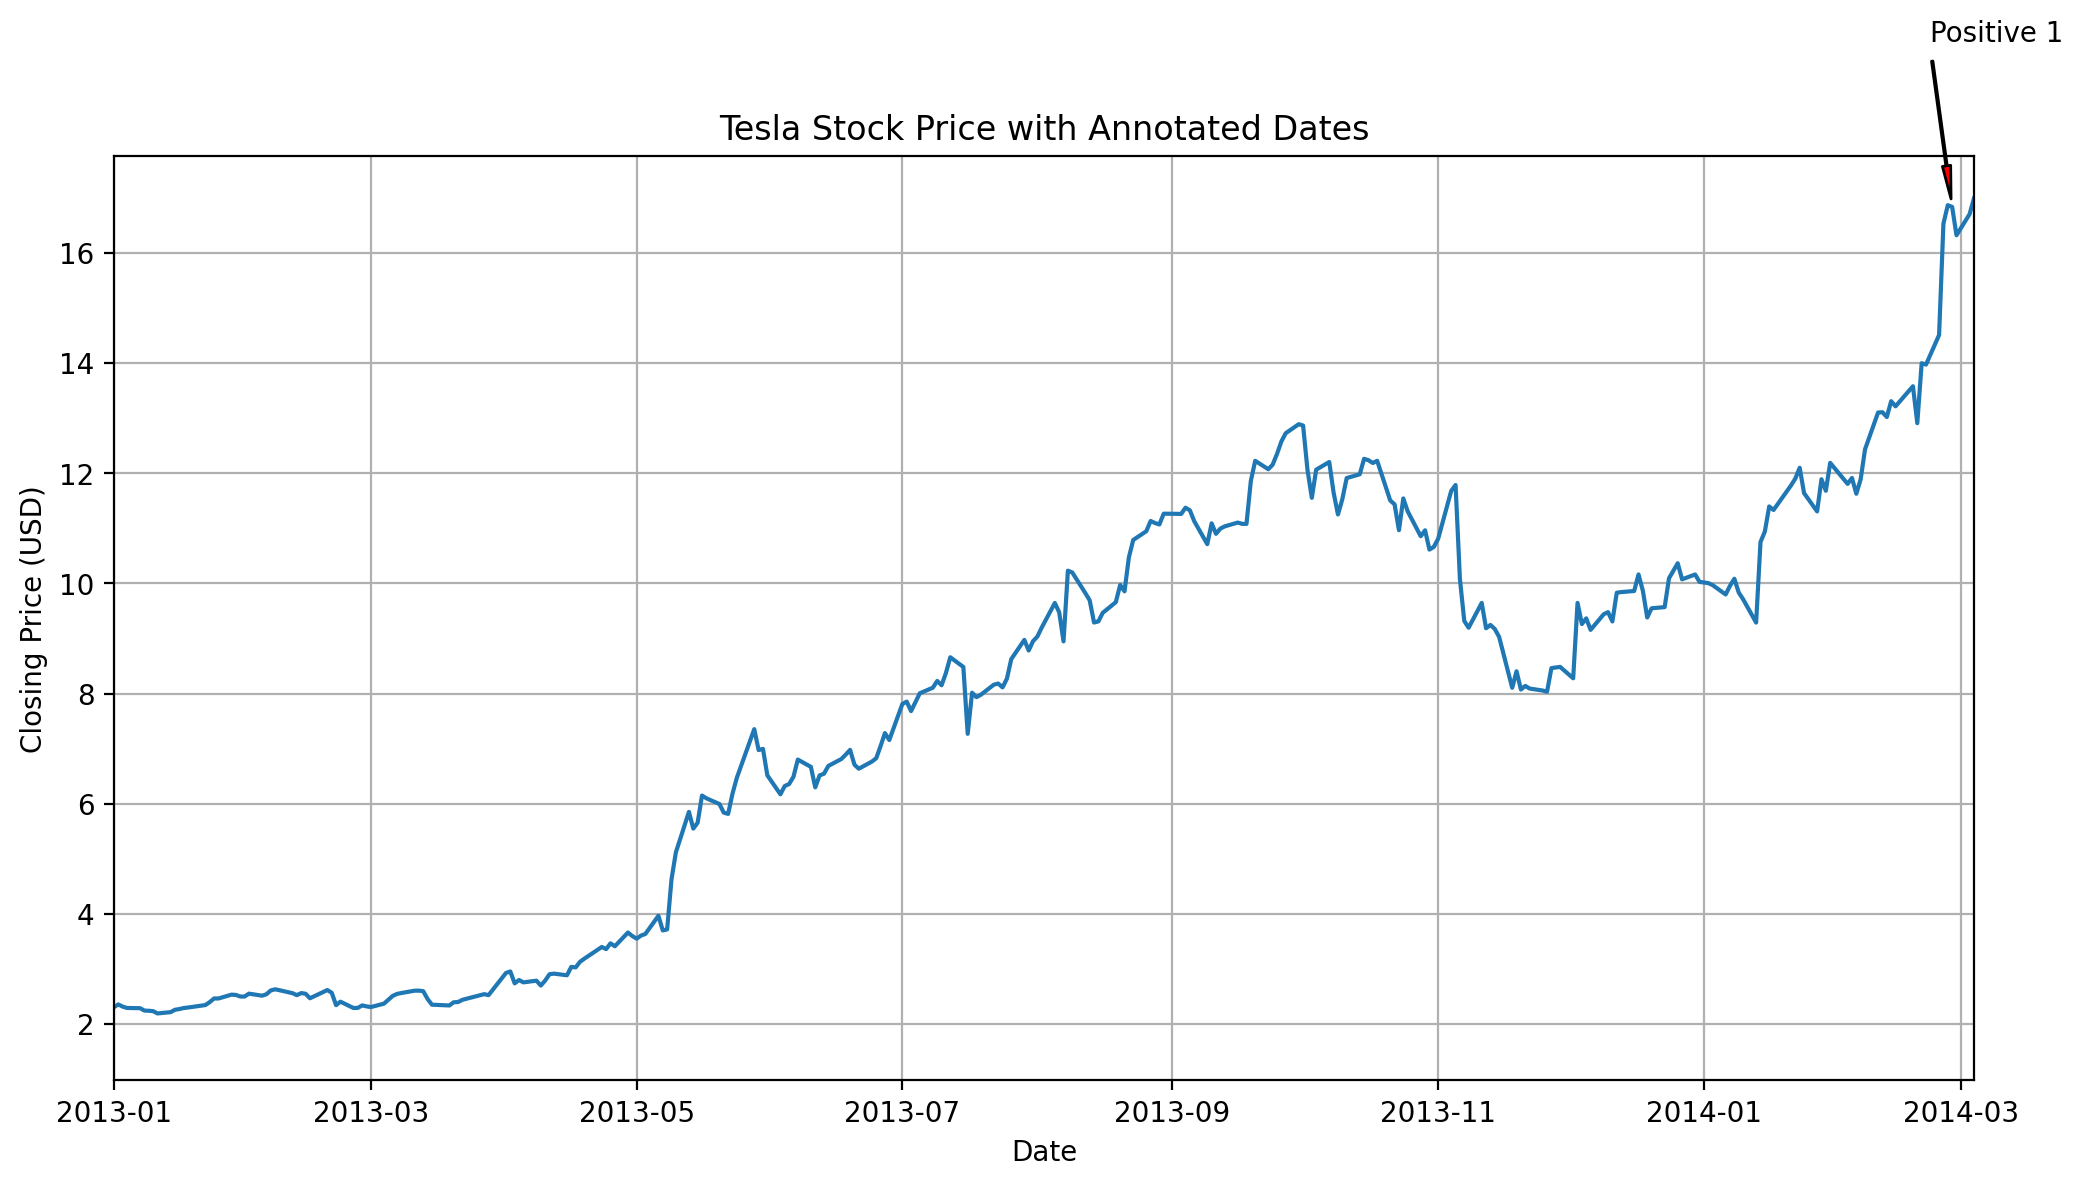

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(tesla_data.index, tesla_data['Close'])
plt.title('Tesla Stock Price with Annotated Dates')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)

# Set x-axis limits to start from January 1, 2013
plt.xlim(pd.Timestamp('2013-01-01'), tesla_data.index.max())

# Add annotations for each date in published_dates_negatives (black arrows)
for i, date in enumerate(published_dates_negatives):
    date_only = date.date()
    date_timestamp = pd.Timestamp(date_only)
    if date_timestamp >= tesla_data.index.min() and date_timestamp <= tesla_data.index.max():
        try:
            close_price = tesla_data.loc[date_timestamp]['Close']
        except KeyError:
            print(f"No stock data available for {date_timestamp}")
            continue
        annotation_text = f"Negative {i + 1}"
        # Adjust xytext and arrowprops for shorter, thinner arrows
        plt.annotate(annotation_text,
                     xy=(date_timestamp, close_price + 0.3),
                     xytext=(date_timestamp - timedelta(days=5), close_price + 5),
                     arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=3 ))  # Reduced width
    else:
        print(f"Date {date_timestamp} is outside the range of available stock data.")

# Add annotations for each date in published_dates_positives (red arrows)
for i, date in enumerate(published_dates_positives):
    date_only = date.date()
    date_timestamp = pd.Timestamp(date_only)
    if date_timestamp >= tesla_data.index.min() and date_timestamp <= tesla_data.index.max():
        try:
            close_price = tesla_data.loc[date_timestamp]['Close']
        except KeyError:
            print(f"No stock data available for {date_timestamp}")
            continue
        annotation_text = f"Positive {i + 1}"
        # Adjust xytext and arrowprops for shorter, thinner arrows
        plt.annotate(annotation_text,
                     xy=(date_timestamp, close_price),
                     xytext=(date_timestamp - timedelta(days=5), close_price + 3),
                     arrowprops=dict(facecolor='red', shrink=0.05, width=0.5, headwidth=3))  # Reduced width
    else:
        print(f"Date {date_timestamp} is outside the range of available stock data.")

plt.show()